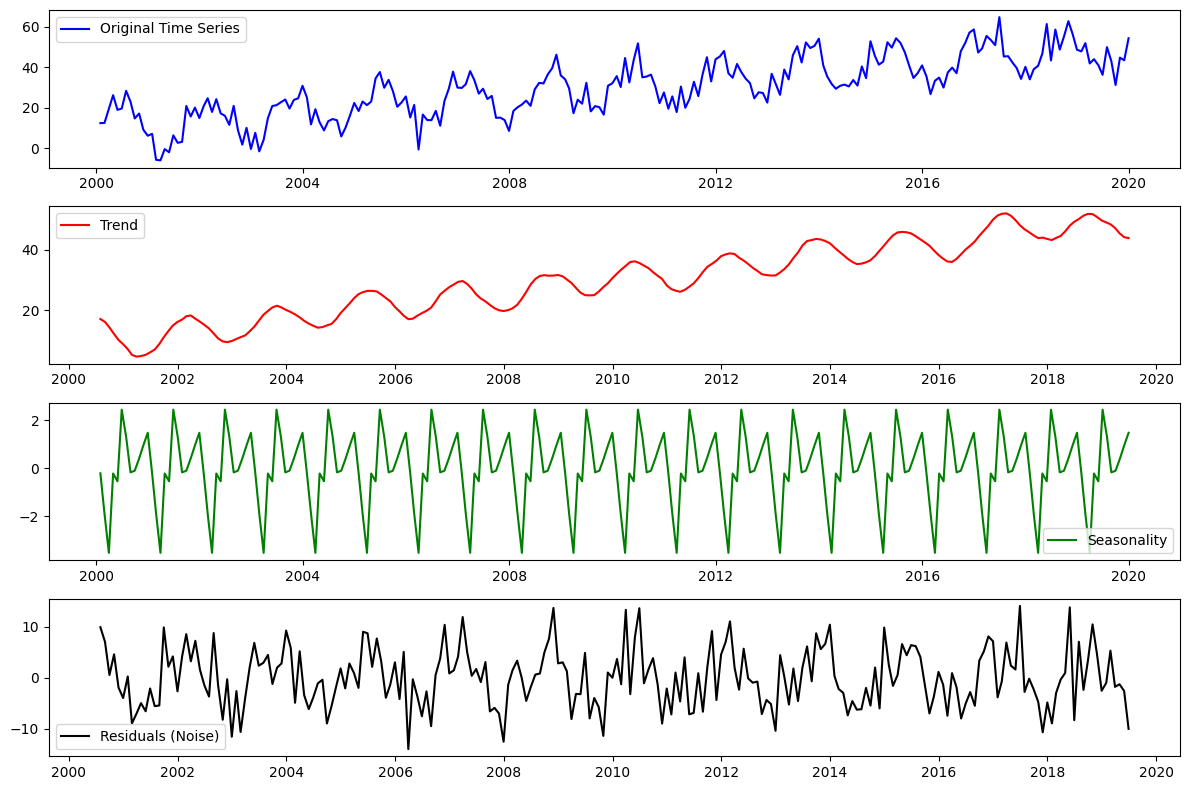

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Generate Synthetic Time Series Data
date_rng = pd.date_range(start='2000-01-01', periods=240, freq='ME')  # 'ME' = End of Month
np.random.seed(42)

trend = np.linspace(10, 50, 240)
seasonality = 10 * np.sin(np.linspace(0, 24 * np.pi, 240))
noise = np.random.normal(scale=5, size=240)

data = trend + seasonality + noise
df = pd.DataFrame({'Date': date_rng, 'Value': data})
df.set_index('Date', inplace=True)

# Step 2: Decompose the Time Series
decomposition = seasonal_decompose(df['Value'], model='additive', period=12)

# Step 3: Plot the Components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['Value'], label='Original Time Series', color='blue')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='red')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals (Noise)', color='black')
plt.legend()

plt.tight_layout()
plt.show()
